In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10}) # pour augmenter la taille de caractère dans les graphiques
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_score 

from decimal import *

92.28200000000001

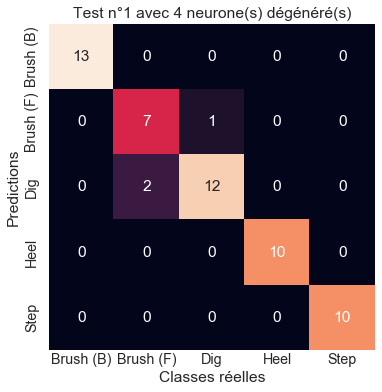

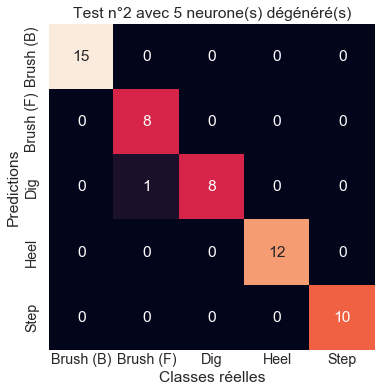

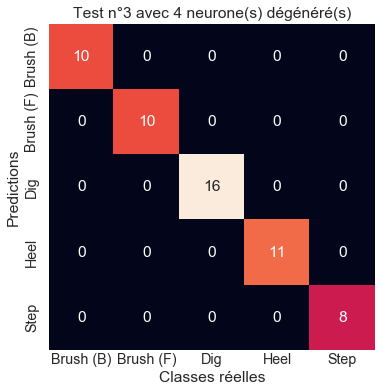

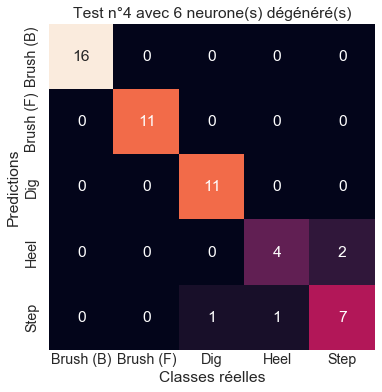

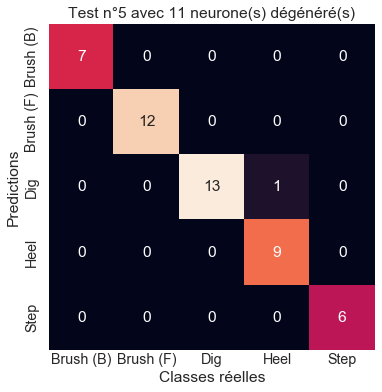

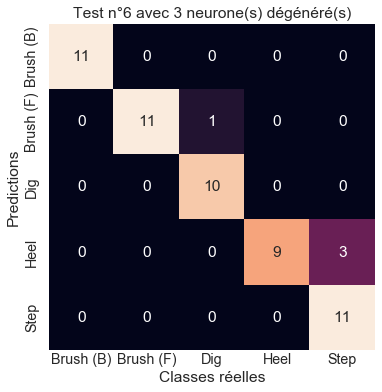

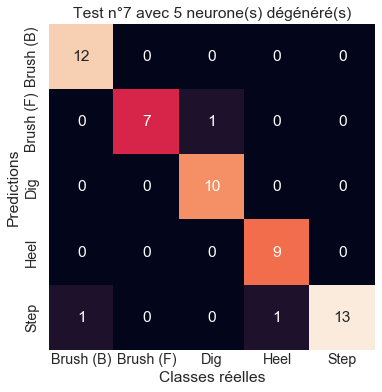

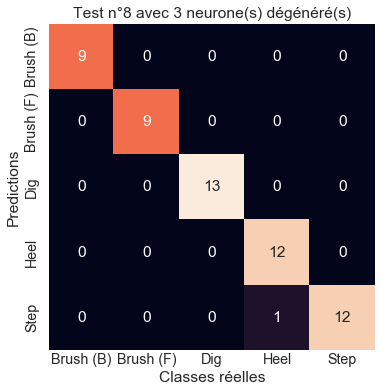

In [25]:
labels = ['brush_back','brush_forward','dig','heel','step']
labels_export = ['Brush (B)','Brush (F)','Dig','Heel','Step']

test_nb = 8

dancer = "Daniel_Ilyas"

j_scores_df = pd.DataFrame()

j_scores_df['Pas'] = labels_export

mode = 'rbf'

norme ='L1'

step_test_nb = 60 # nombre de pas dans l'ensemble de test pour calculer le nombre de neurones dégénérés (dont les résultats ne sont pas compté)

k = 3 # nombre de voisins en mode kNN

for n in range(1,test_nb+1):
    if mode == 'knn':
        path = 'etapdance2/j_score_data_only/NM500/'+ dancer +'/NM500_result_' + str(mode) + '/' + str(norme) + '_k' + str(k) + '/res'+ str(n) +'.txt'
    else:
        path = 'etapdance2/j_score_data_only/NM500/'+ dancer +'/NM500_result_' + str(mode) + '/' + str(norme) + '/res'+ str(n) +'.txt'
    
    NM500_res = pd.read_csv(path)

    NM500_res = NM500_res.replace(1,'brush_back')
    NM500_res = NM500_res.replace(2,'brush_forward')
    NM500_res = NM500_res.replace(3,'dig')
    NM500_res = NM500_res.replace(4,'heel')
    NM500_res = NM500_res.replace(5,'step')
    
    y_test = NM500_res.iloc[:,0]
    y_pred = NM500_res.iloc[:,1]
    
    cm = confusion_matrix(y_test,y_pred)
    plt.figure(figsize = (6,6))
    sns.set(font_scale=1.3) # agrandi la police des matrices de confusion
    ax = sns.heatmap(cm.T, square=True, annot=True
                ,fmt='d', cbar=False
                , xticklabels=labels_export
                , yticklabels=labels_export)
    plt.yticks(va="center")
    plt.xticks(va="center")
    plt.xlabel('Classes réelles')
    plt.ylabel('Predictions');
    plt.title('Test n°' + str(n) + ' avec ' + str((step_test_nb-1)-len(NM500_res)) + ' neurone(s) dégénéré(s)')
    if mode == 'knn':
        name_cm = 'etapdance2/j_score_data_only//NM500/NM500_result_' + str(mode) + '/' + str(norme) + '_k' + str(k) + '/cm/cm_test'+ str(n) +'_'+ str(mode) + '_'+ str(norme) + '.png'
    else:
        name_cm = 'etapdance2/j_score_data_only/NM500/NM500_result_' + str(mode) + '/' + str(norme) +'/cm/cm_test'+ str(n) +'_'+ str(mode) + '_'+ str(norme) +'.png'
    #plt.savefig(fname=name_cm)
    
    j_score = jaccard_score(y_test,y_pred,labels,average=None)
    j_scores_df['T'+ str(n) + ' (%)'] = np.around(j_score*100, decimals=2)
    
j_scores_df['Moyenne (%)'] = np.around(j_scores_df.mean(axis=1), decimals=2)

j_scores_df['Moyenne (%)'].mean()

In [26]:
j_scores_df

,Pas,T1 (%),T2 (%),T3 (%),T4 (%),T5 (%),T6 (%),T7 (%),T8 (%),Moyenne (%)
0,Brush (B),100.0,100.00,100.0,100.00,100.00,100.00,92.31,100.00,99.04
1,Brush (F),70.0,88.89,100.0,100.00,100.00,91.67,87.50,100.00,92.26
2,Dig,80.0,88.89,100.0,91.67,92.86,90.91,90.91,100.00,91.90
3,Heel,100.0,100.00,100.0,57.14,90.00,75.00,90.00,92.31,88.06
4,Step,100.0,100.00,100.0,63.64,100.00,78.57,86.67,92.31,90.15


In [27]:
j_scores_df.to_csv("etapdance2/j_score_data_only/NM500/"+ dancer + "/NM500_result_rbf/score_"+ dancer + "_" + str(mode) + '_' + str(norme) + ".txt",index=False)

81.904

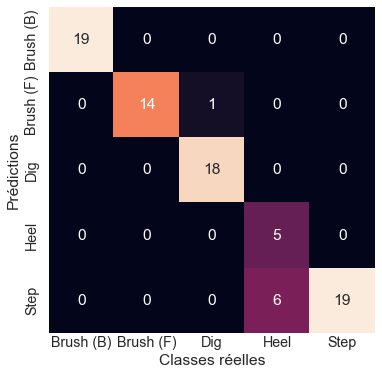

In [16]:
labels = ['brush_back','brush_forward','dig','heel','step']
labels_export = ['Brush (B)','Brush (F)','Dig','Heel','Step']

j_scores_df = pd.DataFrame()

j_scores_df['Pas'] = labels_export

dancer = "daniel"

dataset = "di"

path = 'etapdance2/mesures_situation_reelles/' + dancer + '_res_dtst_' + dataset + '.txt'

NM500_res = pd.read_csv(path, sep=";")

NM500_res = NM500_res.replace(1,'brush_back')
NM500_res = NM500_res.replace(2,'brush_forward')
NM500_res = NM500_res.replace(3,'dig')
NM500_res = NM500_res.replace(4,'heel')
NM500_res = NM500_res.replace(5,'step')

y_test = NM500_res.iloc[:,0]
y_pred = NM500_res.iloc[:,1]

cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (6,6))
sns.set(font_scale=1.3) # agrandi la police des matrices de confusion
ax = sns.heatmap(cm.T, square=True, annot=True
            ,fmt='d', cbar=False
            , xticklabels=labels_export
            , yticklabels=labels_export)
plt.yticks(va="center")
plt.xticks(va="center")
plt.xlabel('Classes réelles')
plt.ylabel('Prédictions');
plt.savefig(fname= 'etapdance2/mesures_situation_reelles/' + dancer + '_cm_dtst_' + dataset + '.png')

j_score = jaccard_score(y_test,y_pred,labels,average=None)
j_scores_df['T'+ str(1) + ' (%)'] = np.around(j_score*100, decimals=2)
    
j_scores_df['Moyenne (%)'] = np.around(j_scores_df.mean(axis=1), decimals=2)

j_scores_df['Moyenne (%)'].mean()

In [11]:
j_scores_df

,Pas,T1 (%),Moyenne (%)
0,Brush (B),7.69,7.69
1,Brush (F),71.43,71.43
2,Dig,70.59,70.59
3,Heel,78.57,78.57
4,Step,43.75,43.75


In [12]:
y_test

0     brush_back
1     brush_back
2     brush_back
3     brush_back
4     brush_back
         ...    
64          step
65          step
66          step
67          step
68          step
Name: 1, Length: 69, dtype: object